In [36]:
%matplotlib inline
%env KERAS_BACKEND=tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import interact
from ipywidgets import interact_manual
# import sympy as sym
# from sympy import S,N
# import locale
# from sklearn.linear_model import LinearRegression
from keras.utils import np_utils #one hot encoding
from keras.models import Sequential #神經網路的框架keras.models
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.models import model_from_json
from keras.datasets import mnist # mnist內 包含手寫測試資料

env: KERAS_BACKEND=tensorflow


In [2]:
(x_train, y_train),(x_test, y_test)=mnist.load_data() #output lenght: len(x_train)=60000, len(x_test)=10000

In [3]:
x_train[9487] #output shape: x_train[9487].shape=(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

1

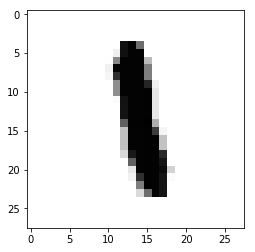

In [4]:
plt.imshow(x_train[9487],cmap='Greys')
y_train[9487]

In [5]:
x_train=x_train.reshape(-1,784)
x_test=x_test.reshape(-1,784)

In [6]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10) #one hot encoding
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [7]:
model=Sequential() # initialize

model.add(Dense(300,input_dim=784)) # 隱藏層第1層 300個，輸入是784個
model.add(Activation('relu'))

model.add(Dense(100)) # 隱藏層第2層 100個
model.add(Activation('relu'))

model.add(Dense(50)) # 隱藏層第3層 50個
model.add(Activation('relu'))

model.add(Dense(20)) # 隱藏層第4層 20個
model.add(Activation('relu'))

model.add(Dense(10)) # 輸出層 10個
model.add(Activation('softmax')) #取exp再平均，這樣可以當成機率值

model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy']) #lr為學習速度learning rate

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
activation_1 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
activation_3 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
__________

In [12]:
model.fit(x_train, y_train, batch_size=100, epochs=10)
# 讓你的model在讀完每100筆資料後調整一次參數
# 讓你的model訓練這60000筆資料訓練10次

Epoch 1/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0019 - acc: 0.9883
Epoch 2/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0019 - acc: 0.9883
Epoch 3/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0019 - acc: 0.9885
Epoch 4/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0018 - acc: 0.9892
Epoch 5/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0018 - acc: 0.9892
Epoch 6/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0017 - acc: 0.9894
Epoch 7/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0017 - acc: 0.9897
Epoch 8/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0016 - acc: 0.9901
Epoch 9/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0016 - acc: 0.9902
Epoch 10/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0016 - acc: 0.9903

In [13]:
predict=model.predict_classes(x_test)
predict

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [42]:
def reverse_one_hot_encodeing(vector):# 下次記得先存好原始資料= =
    s=0
    for i in range(5):
        s+=vector[i]
    if s>0:
        s=0
        for i in range(3):
            s+=vector[i]
        if s>0:
            if vector[0]==1:
                return 0
            elif vector[1]==1:
                return 1
            else:
                return 2
        else:
            if vector[3]==1:
                return 3
            else:
                return 4
    else:
        s=0
        for i in range(5,8):
            s+=vector[i]
        if s>0:
            if vector[5]==1:
                return 5
            elif vector[6]==1:
                return 6
            else:
                return 7
        else:
            if vector[8]==1:
                return 8
            else:
                return 9

In [44]:
def show_predict(index):
    print(predict[index])
    # print(reverse_one_hot_encodeing(y_test[index]))
#     plt.imshow(x_test[index].reshape(28,28))
    plt.imshow(x_test[index].reshape(28,28),cmap='Greys')
interact_manual(show_predict,index=(0,10000-1));

interactive(children=(IntSlider(value=4999, description='index', max=9999), Button(description='Run Interact',…

In [46]:
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 0s 25us/step
loss: 0.005227372317019071
正確率 0.9695


In [48]:
model_json = model.to_json() # 將神經網路變成json格式
open('hand_write_test.json','w').write(model_json)
model.save_weights('hand_write_test.h5') # 將整個model存起來

# 載入已經存好的神經網路

In [50]:
new_model=model_from_json(open('hand_write_test.json').read())
new_model.load_weights('hand_write_test.h5')
new_model.compile(loss='mse', optimizer=SGD(lr=0.087))

[2]


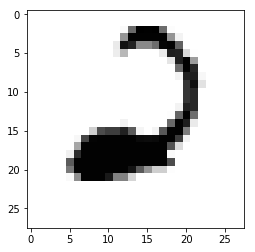

In [54]:
print(new_model.predict_classes(x_test[9487].reshape(1,28*28))) # 注意reshape，有時候可能還會需要硬加一個中括號在外側
plt.imshow(x_test[9487].reshape(28,28),cmap='Greys')